# 6주 1강 Numpy Intermediate

<h2>Aggregation : Min, Max, and Everything In Between</h2>
큰 데이터를 다룰 때 가장 먼저 하는 일 중 하나는 기본 통계를 보는 것 <br>
- 전체의 최대값, 최소값, 최빈값, 평균, 중간값

<h3>Summing the Values in an Array</h3>
Array의 모든 값을 더하고 싶다면?

In [2]:
import numpy as np

In [3]:
L = np.random.random(100)
sum(L)

51.85956755983017

In [4]:
np.sum(L)

51.859567559830154

같은 결과를 내 주긴 하지만 python의 sum보다는 numpy의 sum이 complied code를 사용하기 때문에 빠름

In [6]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

84.7 ms ± 4.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
439 µs ± 68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


sum function과 np.sum function의 작동이 항상 같은 식으로 이루어지지는 않음 <br>
- 다차원 배열에서 다르게 작동함

<h3>Minimum and Maximum</h3>
min과 max도 python의 기본 함수가 있고, numpy 함수도 있음<br>
numpy함수가 더 빠름

In [7]:
min(big_array), max(big_array)

(9.737676464061096e-07, 0.9999991242063091)

In [8]:
np.min(big_array), np.max(big_array)

(9.737676464061096e-07, 0.9999991242063091)

In [9]:
%timeit min(big_array)
%timeit np.min(big_array)

80.3 ms ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
451 µs ± 44.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


sum, min, max는 array의 object function으로 사용이 가능함

In [10]:
print(big_array.min(), big_array.max(), big_array.sum())

9.737676464061096e-07 0.9999991242063091 499687.3707753682


<h3>Multi dimensional aggregates</h3>

다차원 배열을 사용하면서 가장 흔한 aggreation 중 하나는 각 row나 column을 aggregate하는 것 <br>
기본적으로 numpy aggreation function들은 전체의 array 값에 대해서만 동작함

In [12]:
M = np.random.random((3,4))
print(M)

[[0.52511857 0.97757351 0.23835539 0.62705568]
 [0.32061815 0.88197523 0.75557835 0.21195102]
 [0.83523452 0.25918729 0.16309567 0.28727537]]


In [13]:
M.sum()

6.083018766016703

axis를 명시하면 column이나 row에 대한 계산이 가능함 <br>
- 각 row에 대한 값 : axis = 0 <br>
- 각 column에 대한 값 : axis = 1 <br>

In [14]:
M.min(axis=0)

array([0.32061815, 0.25918729, 0.16309567, 0.21195102])

In [16]:
M.max(axis=1)

array([0.97757351, 0.88197523, 0.83523452])

axis 파라미터는 "어떤 차원"을 축소할 것인지를 명시해줌
- 0 : 첫번째 axis를 축소 -> 2차원 행렬에서의 row

<h3>Other aggregation functions</h3>

Numpy에는 많은 aggregation function이 있음 <br>
aggregation functiondptj NaN이 데이터가 있으면 에러가 남
- Nan-safe 대응 함수가 존재함 <br>

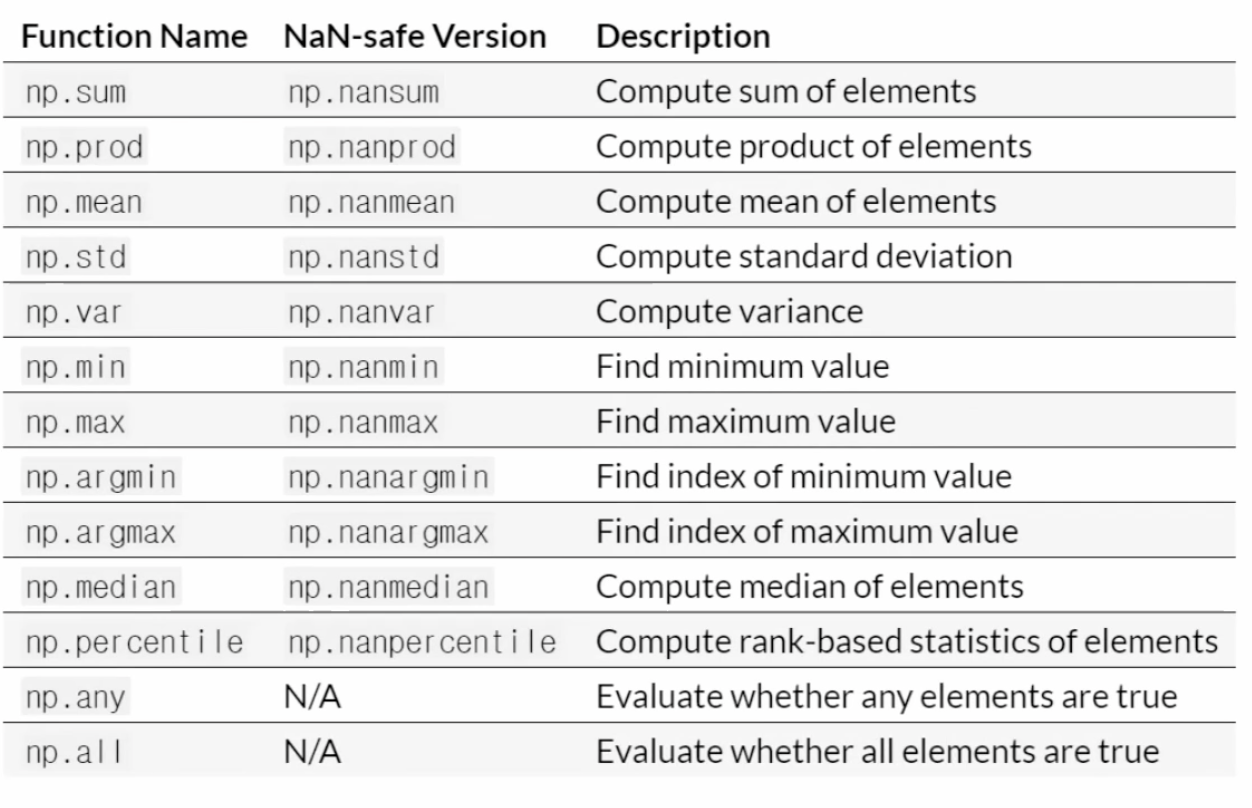

<h3>ex) 미국 대통령의 평균 키는? </h3>

data/president_heights.csv 파일 사용

In [22]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 190 182]


요약 통계 내기

In [25]:
print("Mean height               :", heights.mean())
print("Standard deviation height :", heights.std())
print("Minimun height            :", heights.min())
print("Maximum height            :", heights.max())

Mean height               : 180.02272727272728
Standard deviation height : 6.949455951117967
Minimun height            : 163
Maximum height            : 193


quantile, percentile 도 쉽게 구할 수 있음

In [27]:
print("25th percentile    :", np.percentile(heights, 25))
print("Median.            :", np.median(heights))
print("75th percentile    :", np.percentile(heights, 75))

25th percentile    : 174.75
Median.            : 182.0
75th percentile    : 183.5


간단한 시각화를 진행해봄

In [29]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Text(0, 0.5, 'number')

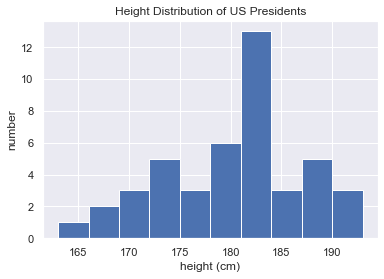

In [34]:
plt.hist(heights)
plt.title("Height Distribution of US Presidents")
plt.xlabel("height (cm)")
plt.ylabel("number")

# Computation on Arrays : Broadcasting

UFuncs를 사용하는 이유 : python loop에 비해서 벡터화된 ufuncs가 빠르기 때문에 <br>
Broadcasting : 서로 다른 사이즈의 배열에 대한 binary ufuncs을 다루는 방법 <br>

<h3>Introducing Broadcasting</h3>

같은 크기의 array에 대한 binary operation은 성분별로 이루어짐

In [35]:
a = np.array([0,1,2])
b = np.array([5,5,5])

In [36]:
a+b

array([5, 6, 7])

Broadcasting은 서로 다른 사이즈의 Array가 binary operation 인자로 들ㄹ어왔을 때 작은 쪽 array가 어떤 식으로 변형되어 작동되는 방식 <br>
scalar도 0-dim array로 볼 수 있음

In [37]:
a + 5

array([5, 6, 7])

scalar인 5를 array[5,5,5]로 변환하고 이를 원 행렬에 더한 것으로 볼 수 있음 <br>
Numpy broadcating 장점 : array가 변환되는 것이 아니기 때문에 효율적으로 작동 <br>

In [38]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [39]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

1d array인 a가 두번째 축으로 broadcast되어서 M과 같은 형태가 됨 <br>
2개의 array shape는 다른 경우?

In [41]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [42]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

a와 b가 모두 확장되고 같은 형태로 변형됨 <br>

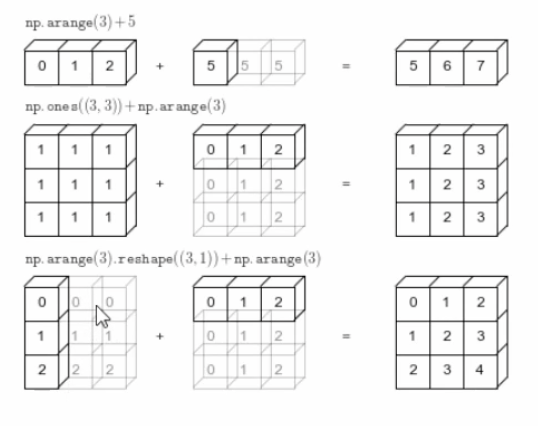

<h3>Rules of Broadcasting</h3>

Numpy의 Broadcasting은 두 array의 형태에 따라 아래의 3가지 규칙에 의해 결정됨 <br>
- 1. 두 Array의 차원이 다르다면 적은 쪽 array가 차원이 확장되는 left-side padding을 함 <br>
- 2. 두 Array의 모든 차원에서 shape가 다르면 차원 중 shape가 1인 array를 확장해서 다른 array와 shape를 맞춤 <br>
- 3. 두 Array의 어떤 차원에서든 shape가 다르고, 둘 중 한 차원도 size가 1이 아니라면 에러 발생

<h4>Broadcasting example 1</h4>

2d array와 1d array

In [44]:
M = np.ones((2,3))
a = np.arange(3)

print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


M.shape = (2,3) <br>
a.shape = (3,) <br>

Rule1에 의해 a가 더 낮은 차원이므로 a의 shape가 변함<br> 
a.shape(1,3)

Rule2에 의해 first dimension의 크기가 일치하지 않으므로 첫 차원의 크기가 변화 <br>
M.shape = (2,3)<br>
a.shape = (2,3)<br>
-> array는 (2,3)의 shape가 됨


In [45]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

<h4>Broadcasting example 2</h4>

2d array와 2d array

In [46]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)

print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


a.shape = (3,1) <br>
b.shape = (3,) <br>

Rule1에 의해 b의 shape가 변함<br> 
b.shape(1,3)

Rule2에 의해 a,b 모두 shape가 변화 <br>
a.shape = (3,3)<br>
b.shape = (3,3)<br>
-> array는 (3,3)의 shape가 됨

In [47]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

<h4>Broadcasting example 3</h4>

두 array가 Broadcasting을 할 수 없는 경우

In [49]:
M = np.ones((3,2))
a = np.arange(3)
print(M)
print(a)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


M.shape = (3,2) <br>
a.shape = (3,) <br>
- M이 transpose되어 있음

Rule1에 의해 a의 shape가 변함<br> 
a.shape(1,3)

Rule2에 의해 a의 첫번째 차원이 M과 매칭되도록 커짐 <br>
M.shape = (3,2)<br>
a.shape = (3,3)<br>

Rule3에 의해 더이상 변화할 수 없음 -> 에러 발생

In [50]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

a가 right padding을 한다고 가정하면 두 개를 더할 수 있음 <br>
자동으로 작동하면 두 가지가 모두 가능한 경우에 혼란을 가져올 수 있어 right-side padding은 지원하지 않음
- 꼭 필요한 경우에는 np.newaxis를 이용

ufunc도 위와 같이 동작함 <br>
logaddexp(a,b) = log(exp(a) + exp(b))

In [52]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

# Broadcasting in Practice
<h3>Centering an array</h3>
Array 데이터의 평균을 0으로 만드는 작업

In [54]:
X = np.random.random((10,3))
X

array([[0.1346768 , 0.51034939, 0.16856571],
       [0.5338578 , 0.95182408, 0.30518467],
       [0.87122983, 0.46348971, 0.66917698],
       [0.72914105, 0.37668996, 0.8923433 ],
       [0.44253128, 0.98367487, 0.57230154],
       [0.85198822, 0.43847289, 0.1656339 ],
       [0.21772836, 0.17817977, 0.8506922 ],
       [0.31110019, 0.99876969, 0.18873097],
       [0.9377643 , 0.66359461, 0.60583285],
       [0.81316957, 0.6487303 , 0.08013681]])

In [57]:
Xmean = X.mean(0)
Xmean

array([0.58431874, 0.62137753, 0.44985989])

X를 각 차원의 평균으로 뺀 것으로 X의 평균을 0으로 만들어 봄
- Numerical Precision보다 작은 값이므로 평균이 0인 것을 알 수 있음

In [58]:
X_centered = X - Xmean
X_centered.mean(0)

array([-5.55111512e-17, -3.33066907e-17, -2.22044605e-17])

In [59]:
print(np.finfo(np.float).eps)

2.220446049250313e-16


/var/folders/d2/ps9m0gd51mz84h38fqzd3q1h0000gn/T/ipykernel_44127/4254039331.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.finfo(np.float).eps)


<h3>Plotting a two-dimensional function</h3>

2d function으로 그림을 그리는 경우 유용함 <br>
z = f(x,y)형태의 function을 만드는 경우

In [60]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [61]:
import matplotlib.pyplot as plt

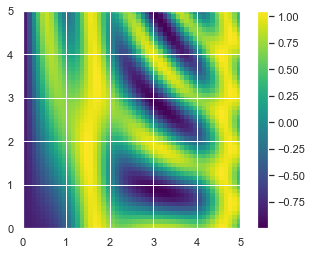

In [66]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()
plt.show()

# Comparisons, Masks, and Boolean Logic

Numpy array의 강력한 점 중 하나는 Boolean을 통한 masking이 가능함 <br>
조건에 맞는 값만 골라내는 등의 일을 할 수 있음 <br>
ex) 특정 값보다 큰 값만 골라내거나 일정 값을 넘는 outlier를 모두 지우거나 하는 일이 가능 <br>

<h3>Example) Counting Rainy Days</h3>

시애틀의 일 평균 강수량 데이터를 통해 Boolean Logic 테스트를 해봄

In [70]:
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall/254.0
print(type(inches), inches.shape)

<class 'numpy.ndarray'> (365,)


Array에는 365개의 값이 있음 <br>
각각 14.01.01~ 14.12.31까지 시애틀의 일별 강수량을 나타냄 <br>

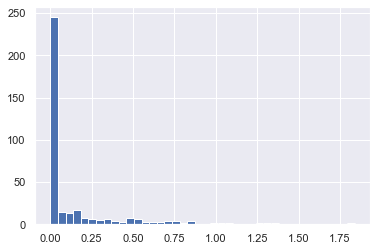

In [71]:
plt.hist(inches, 40)
plt.show()

시애틀은 일년 내내 비가 많이 오는 것으로 유명하나 실제로 대부분의 경우 0 근처에 강수량이 몰려 있음 <br>
- 생각보다 비가 오지 않음 <br>
- 이것으로 시애틀의 기후를 모두 알 수는 없음 <br>

ex) 시애틀은 일년에 며칠이나 비가 올까? 비가 오는 날의 강수량의 평균은? 0.5인치 이상 비가 온 날은 며칠이나 될까? <br>
Loop를 통해서 찾을 수 있으나 매우 느림 <br>
- Boolean operation을 사용하면 유용함

<h3>Comparison Operators as ufuncs</h3>

ufuncs에는 비교 연산자도 있음 : 작다 혹은 크다 같은 것 <br>
operation은 elementwise로 작동함
- 각 성분이 특정 값이나 특정 array와 비교해서 크거나 같은지를 확인해볼 수 있음

In [72]:
x = np.array([1,2,3,4,5])

In [73]:
x < 3

array([ True,  True, False, False, False])

In [80]:
x > 3

array([False, False, False,  True,  True])

In [75]:
x <= 3

array([ True,  True,  True, False, False])

In [76]:
x >= 3

array([False, False,  True,  True,  True])

In [77]:
x != 3

array([ True,  True, False,  True,  True])

In [78]:
x == 3

array([False, False,  True, False, False])

단순한 연산 뿐 아니라 이러한 비교 연산의 조합이 가능함 <br>
2를 곱한 값과 제곱이 같은 경우를 찾고 싶으면 아래 형태의 논리식을 사용

In [79]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

사칙 연산과 동일하게 이러한 x < 3 operator는 내부적으로 NumPy에서는 np.less(x,3)함수를 호출함

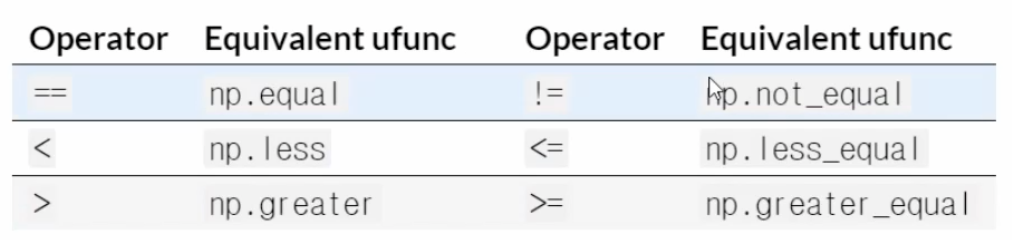

In [81]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [82]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

모든 경우에 반환되는 결과는 boolean array이고 참과 거짓 값만을 가진 array

<h3>Working with Boolean Arrays</h3>


In [83]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


<h4>Counting entries</h4>

참값만을 세 봄 <br>
np.count_nonzero : False는 0처럼 취급

In [84]:
np.count_nonzero(x<6)

8

8개의 element가 6보다 작은 것을 알 수 있음 <br>
True는 1처럼 취급되므로 np.sum을 사용할 수도 있음

In [86]:
np.sum(x < 6)

8

sum은 axis별로 작동하게 할 수 있으므로 각 column 혹은 row에 대해서 True의 숫자를 세는 데에도 유용

In [87]:
np.sum(x<6, axis=1)

array([4, 2, 2])

boolean operation과 np.any와 np.all을 결합해서 간단한 특성들에 대해 체크가 가능함

In [88]:
np.any(x> 8)

True

In [89]:
np.any(x< 0)

False

In [90]:
np.all(x < 10)

True

In [91]:
np.all(x == 6)

False

np.all와 np.any 또한 특정 축에 대해서 계산이 가능함

In [92]:
np.all(x < 8, axis=1)

array([ True, False,  True])

2번 row 경우를 제외하고 모두 8보다 작은 것을 알 수 있음 <br>
python의 내장 sum(), any(), all() 함수와 numpy 내부의 함수와 작동이 같지 않은 것을 유의해야 함

# 강수량 데이터

강수량이 0.5인치보다 크고 1인치보다 작은 날을 구해봄 <br>
Boolean값의 연산은 Python의 bitwise logic operators (&, |, ^, ~)을 통해서 가능함 <br>
Numpy는 이러한 비트논리 연산자를 element-wise하게 overloading하여 작동함

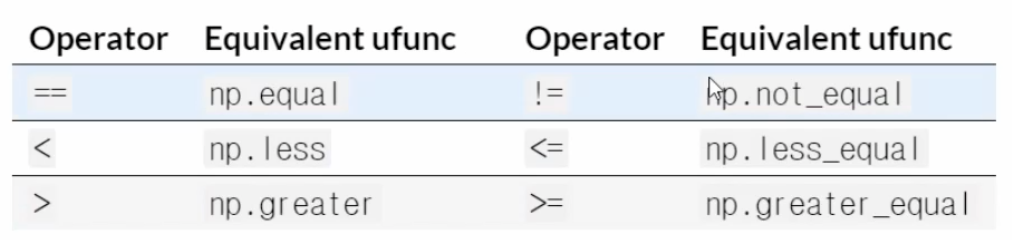

In [93]:
np.sum((inches > 0.5) & (inches < 1))

29

0.5인치 ~ 1인치 사이로 비가 온 날은 총 29일 <br>
np.sum((inches > 0.5 & inches < 1)) 형태로 식이 주어진다면 우선순위 규칙으로 아래와 같이 작동됨 <br>
inches > (0.5 & inches) < 1 <br>

A and B == Not(Not A or Not B)

In [97]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

In [99]:
print("Number days without rain                 : ", np.sum(inches == 0))
print("Number days with rain                    : ", np.sum(inches != 0)) 
print("Days with more than 0.5 inches           : ", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches             : ", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain                 :  215
Number days with rain                    :  150
Days with more than 0.5 inches           :  37
Rainy days with < 0.2 inches             :  75


# Boolean Arrays as Masks

더 중요한 것은 이러한 Boolean Array를 일종의 "Mask"로 쓸 수 있음 <br>
Mask로 쓰면 특정 조건에 맞는 값만 추출하는 Indexing 등을 쉽게 수행할 수 있음

In [101]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [102]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

masking operation을 통해서 이러한 값들만 골라낼 수 있음 <br>
간단히 [ ]에 위의 array 혹은 논리식을 넣어 주면 됨

In [103]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

True로 마스킹 된 값들만 출력되었음 <br>
원하는 종류의 값만 골라내어 다양한 연산을 수행할 수 있음 <br>

In [105]:
rainy = (inches > 0)

days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches)      : ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches)     : ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches)    : ", np.max(inches[summer]))
print("Maximum precip on non-summer rainy days (inches)  : ", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches)      :  0.19488188976377951
Median precip on summer days in 2014 (inches)     :  0.0
Maximum precip on summer days in 2014 (inches)    :  0.8503937007874016
Maximum precip on non-summer rainy days (inches)  :  0.20078740157480315


# Aside : Using the Keywords and/or Versus the Operators &/|

and/or 와 &/|의 차이점 <br>
and/or : 전체 object에 대한 연산을 수행함 <br>
- Python의 object를 한 개의 Boolean 값으로 봄

&/| : object의 안에 있는 Bit에 대해 연산을 수행함  <br>
- Python에서 0이 아닌 모든 값을 Boolean으로 변환하면 True

In [106]:
bool(42), bool(0)

(True, False)

In [107]:
bool(42 and 0)

False

In [108]:
bool(42 or 0)

True

& and |을 정수에 대해 사용할 때는 이 정수의 binary bit에 대해서 논리연산을 수행하게 됨 <br>
and or을 모든 bit에 대해 수행하는 것

In [109]:
bin(42)

'0b101010'

In [110]:
bin(59)

'0b111011'

In [111]:
bin(42 & 59)

'0b101010'

In [112]:
bin(42 | 59)

'0b111011'

In [113]:
A = np.array([1,0,1,0,1,0], dtype=bool)
B = np.array([1,1,1,0,1,1], dtype=bool)
A|B

array([ True,  True,  True, False,  True,  True])

In [114]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

np.array에 대해서는 and, or는 정의되지 않음

In [115]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [116]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()